# Credit Card Fraud Detection - Logistic Regression

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [12]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [13]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [14]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211963,138649.0,1.514668,-0.606023,-2.417880,1.110364,1.268388,0.810167,0.740013,0.044583,-0.200131,...,0.364450,0.828378,-0.279929,-1.604975,0.363869,-0.296747,-0.027881,-0.057200,224.00,0
98711,66780.0,-1.667875,-0.604567,2.680553,0.586580,0.693961,1.849982,0.248264,0.611121,-0.312163,...,0.330366,0.738810,0.291745,-0.948864,-0.029229,1.008123,-0.203566,-0.155378,177.17,0
165010,117140.0,0.077913,-0.844492,-0.047787,-1.536852,2.401581,-2.912785,-4.796991,-2.507223,0.537484,...,2.653487,-0.585700,-5.299466,0.329258,-2.282610,-0.631412,0.755998,0.619049,25.00,0
185276,126602.0,2.035518,0.008855,-1.092408,0.431909,-0.022494,-1.128530,0.263056,-0.343468,0.665253,...,-0.243174,-0.508157,0.292617,-0.032043,-0.112572,-0.582649,-0.003914,-0.048467,4.99,0
182156,125284.0,-1.067544,0.989980,1.266570,2.513863,2.182229,1.589030,1.171470,0.057755,-1.617330,...,-0.004111,0.261724,-0.602000,-0.379513,1.264782,0.306859,-0.295648,-0.171370,28.37,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93254.111789,0.096516,-0.073627,0.117752,-0.019400,0.047424,0.051977,0.101349,0.052886,0.000575,...,0.035545,-0.006480,-0.010469,-0.017350,-0.027014,-0.010557,-0.040805,0.003924,0.010095,101.286585
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [20]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
211963  138649.0  1.514668 -0.606023 -2.417880  1.110364  1.268388  0.810167   
98711    66780.0 -1.667875 -0.604567  2.680553  0.586580  0.693961  1.849982   
165010  117140.0  0.077913 -0.844492 -0.047787 -1.536852  2.401581 -2.912785   
185276  126602.0  2.035518  0.008855 -1.092408  0.431909 -0.022494 -1.128530   
182156  125284.0 -1.067544  0.989980  1.266570  2.513863  2.182229  1.589030   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

211963    0
98711     0
165010    0
185276    0
182156    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [27]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.951715374841169


In [29]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234


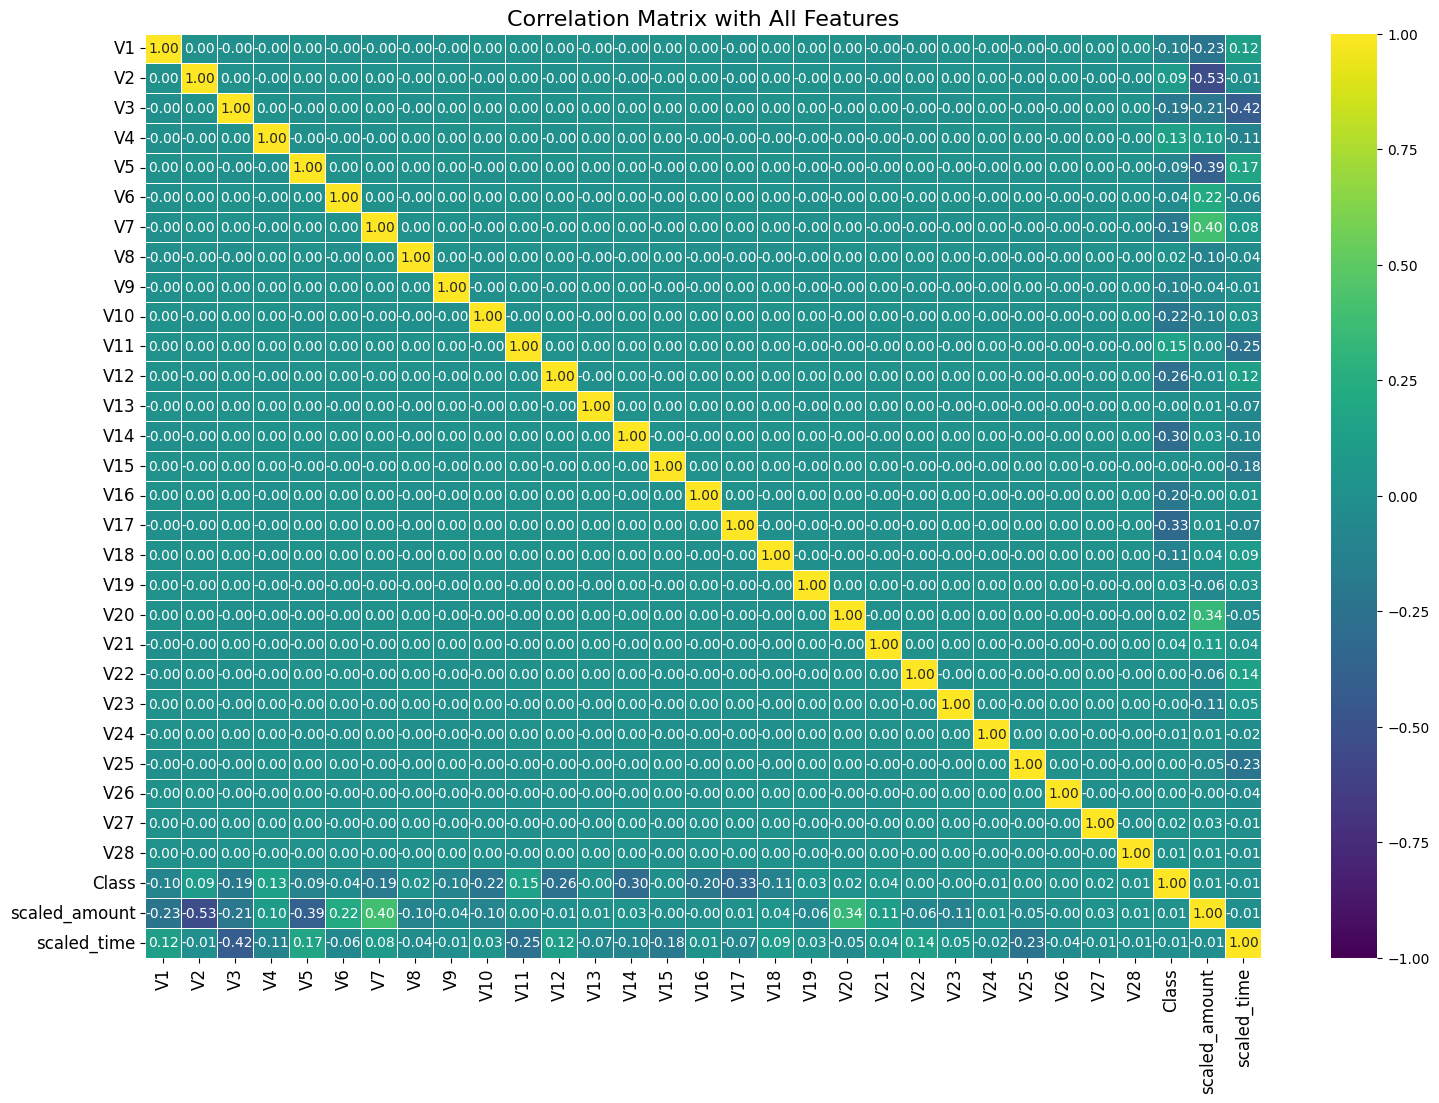

Significant Features (Correlation > 0.1):
 ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Removed Insignificant Features (Correlation <= 0.1):
 ['V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']

Model Accuracy: 93.75%

Response Time: 1.3300 seconds

Confusion Matrix:
 [[55315  1435]
 [ 5668 51308]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     56750
           1       0.97      0.90      0.94     56976

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726


Prediction for Fraudulent Transaction:
The transaction is not fraudulent.

Prediction for Non-Fraudulent Transaction:
The transaction is not fraudulent.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import time

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Feature scaling: Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns after scaling
df = df.drop(['Amount', 'Time'], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix with the 'viridis' colormap (a new colormap)
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix with All Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Define a threshold for selecting significant variables
significant_corr_threshold = 0.1
correlation_with_target = correlation_matrix['Class'].drop('Class')

# Identify significant features based on the threshold
significant_features = correlation_with_target[abs(correlation_with_target) > significant_corr_threshold].index.tolist()
insignificant_features = correlation_with_target[abs(correlation_with_target) <= significant_corr_threshold].index.tolist()

print("Significant Features (Correlation > 0.1):\n", significant_features)
print("\nRemoved Insignificant Features (Correlation <= 0.1):\n", insignificant_features)

# Keep only significant features
df_significant = df[significant_features + ['Class']]

# Define X (features) and y (target)
X = df_significant.drop('Class', axis=1)
y = df_significant['Class']

# Handling the imbalanced dataset using SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model and measure response time
start_time = time.time()  # Start timer
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
end_time = time.time()  # End timer

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
response_time = end_time - start_time

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print(f"\nResponse Time: {response_time:.4f} seconds")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Now, let's predict for two new transactions (fraudulent and non-fraudulent)

# New fraudulent transaction example
new_data_fraudulent = pd.DataFrame({
    'V1': [1.76321],  'V3': [1.8953], 'V4': [2.564], 'V7': [-1.8954], 'V10': [0.58294],
    'V11': [-1.87654],  'V12': [1.543],  'V14': [-0.56423],  'V16': [0.76435],  'V17': [-1.564],
    'V18': [0.6573], 'scaled_amount': scaler.transform([[800]]).flatten(), 'scaled_time': scaler.transform([[150000]]).flatten()
})

# New non-fraudulent transaction example
new_data_non_fraudulent = pd.DataFrame({
    'V1': [-1.359807],  'V3': [2.536346], 'V4': [1.378155], 'V7': [0.239599], 'V10': [0.090794],
    'V11': [-0.5516],  'V12': [0.415798],  'V14': [0.069083],  'V16': [0.237609],  'V17': [-0.377869],
    'V18': [0.505056], 'scaled_amount': scaler.transform([[123.45]]).flatten(), 'scaled_time': scaler.transform([[10000]]).flatten()
})

# Drop unnecessary columns for prediction (since only significant features are used)
new_data_fraudulent = new_data_fraudulent[significant_features]
new_data_non_fraudulent = new_data_non_fraudulent[significant_features]

# Predict whether the new transactions are fraudulent
prediction_fraudulent = model.predict(new_data_fraudulent)
prediction_non_fraudulent = model.predict(new_data_non_fraudulent)

# Interpret the predictions
print("\nPrediction for Fraudulent Transaction:")
if prediction_fraudulent[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nPrediction for Non-Fraudulent Transaction:")
if prediction_non_fraudulent[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")


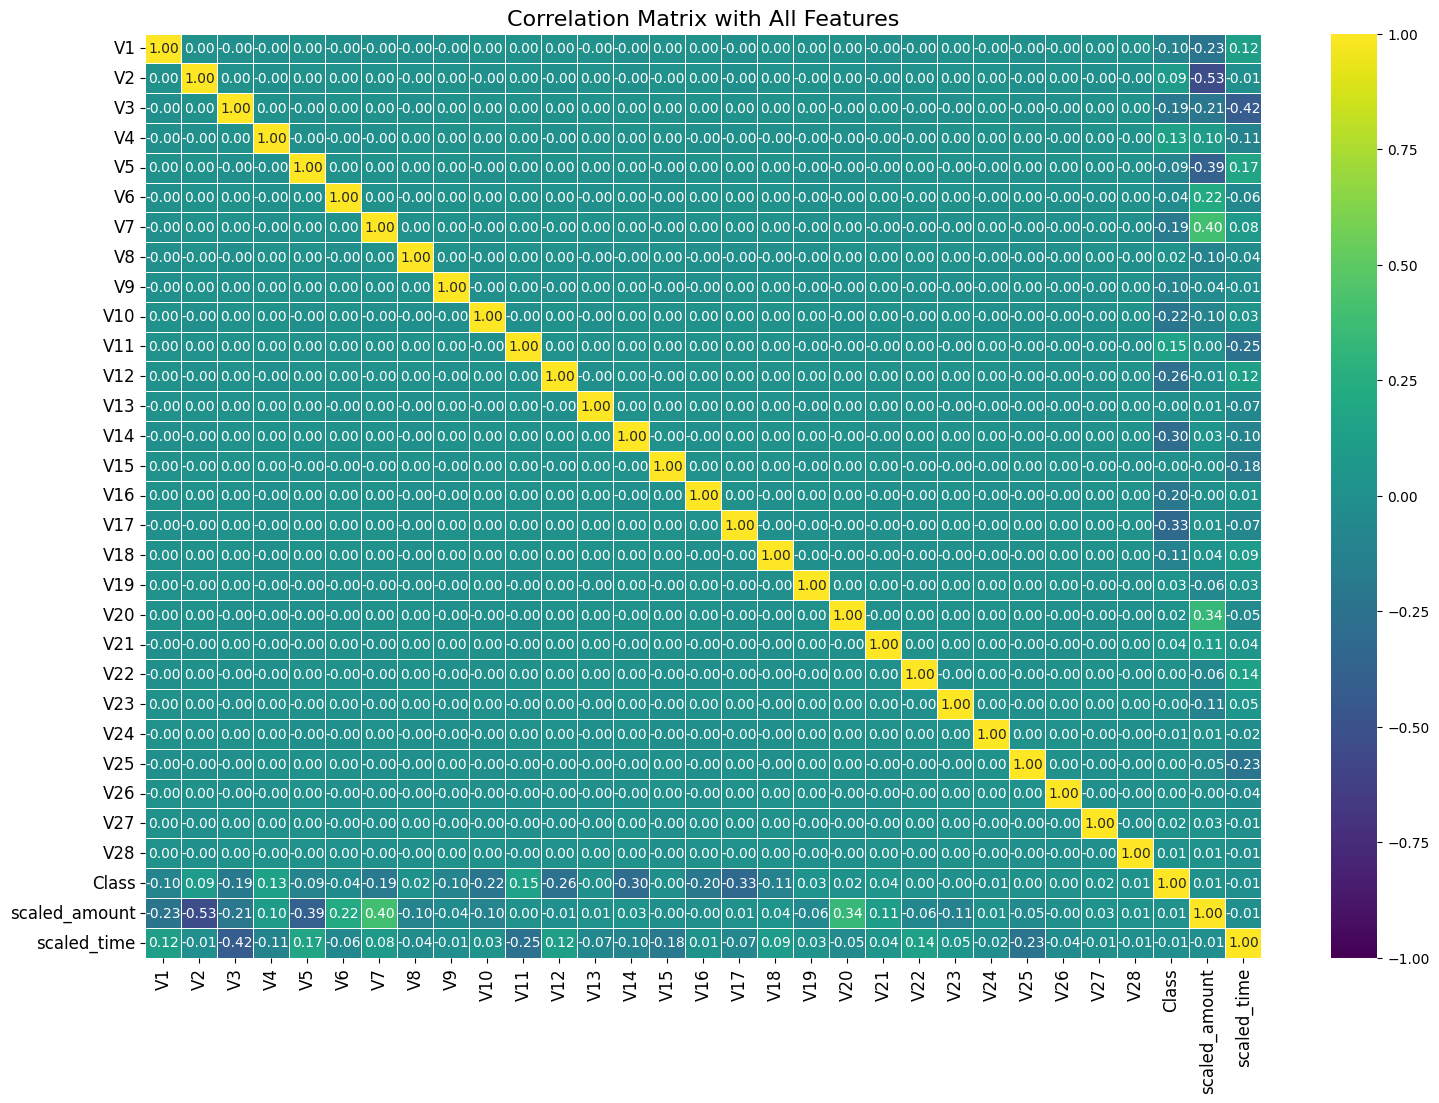

Significant Features (Correlation > 0.1):
 ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Removed Insignificant Features (Correlation <= 0.1):
 ['V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']

Model Accuracy: 93.75%

Response Time for Training: 0.7130 seconds

Confusion Matrix:
 [[55315  1435]
 [ 5668 51308]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     56750
           1       0.97      0.90      0.94     56976

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726


Prediction for Fraudulent Transaction with Significant Features:
The transaction is not fraudulent.

Response Time for Significant Features Prediction: 0.0026 seconds

Prediction for Non-Fraudulent Transaction

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import time

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Feature scaling: Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns after scaling
df = df.drop(['Amount', 'Time'], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix with the 'viridis' colormap (a new colormap)
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix with All Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Define a threshold for selecting significant variables
significant_corr_threshold = 0.1
correlation_with_target = correlation_matrix['Class'].drop('Class')

# Identify significant features based on the threshold
significant_features = correlation_with_target[abs(correlation_with_target) > significant_corr_threshold].index.tolist()
insignificant_features = correlation_with_target[abs(correlation_with_target) <= significant_corr_threshold].index.tolist()

print("Significant Features (Correlation > 0.1):\n", significant_features)
print("\nRemoved Insignificant Features (Correlation <= 0.1):\n", insignificant_features)

# Keep only significant features
df_significant = df[significant_features + ['Class']]

# Define X (features) and y (target)
X = df_significant.drop('Class', axis=1)
y = df_significant['Class']

# Handling the imbalanced dataset using SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model and measure response time
start_time = time.time()  # Start timer
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
end_time = time.time()  # End timer

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
response_time = end_time - start_time

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print(f"\nResponse Time for Training: {response_time:.4f} seconds")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Now, let's predict for two new transactions (fraudulent and non-fraudulent)

# New fraudulent transaction example
new_data_fraudulent = pd.DataFrame({
    'V1': [1.76321], 'V3': [1.8953], 'V4': [2.564], 'V7': [-1.8954], 'V10': [0.58294],
    'V11': [-1.87654], 'V12': [1.543], 'V14': [-0.56423], 'V16': [0.76435], 'V17': [-1.564],
    'V18': [0.6573], 'scaled_amount': scaler.transform([[800]]).flatten(), 'scaled_time': scaler.transform([[150000]]).flatten()
})

# New non-fraudulent transaction example
new_data_non_fraudulent = pd.DataFrame({
    'V1': [-1.359807], 'V3': [2.536346], 'V4': [1.378155], 'V7': [0.239599], 'V10': [0.090794],
    'V11': [-0.5516], 'V12': [0.415798], 'V14': [0.069083], 'V16': [0.237609], 'V17': [-0.377869],
    'V18': [0.505056], 'scaled_amount': scaler.transform([[123.45]]).flatten(), 'scaled_time': scaler.transform([[10000]]).flatten()
})

# Dropping unnecessary columns for prediction (since only significant features are used)
new_data_fraudulent_all = new_data_fraudulent.copy()  # Keeping all features for a separate prediction
new_data_non_fraudulent_all = new_data_non_fraudulent.copy()  # Keeping all features for a separate prediction

new_data_fraudulent = new_data_fraudulent[significant_features]
new_data_non_fraudulent = new_data_non_fraudulent[significant_features]

# Predict for new transactions using only significant features
start_time_significant = time.time()  # Start timer for significant features
prediction_fraudulent_significant = model.predict(new_data_fraudulent)
prediction_non_fraudulent_significant = model.predict(new_data_non_fraudulent)
end_time_significant = time.time()  # End timer for significant features
response_time_significant = end_time_significant - start_time_significant

# Predict for new transactions using all features
start_time_all = time.time()  # Start timer for all features
# Use only significant features for prediction
prediction_fraudulent_all = model.predict(new_data_fraudulent_all[significant_features])
prediction_non_fraudulent_all = model.predict(new_data_non_fraudulent_all[significant_features])
end_time_all = time.time()  # End timer for all features
response_time_all = end_time_all - start_time_all

# Interpret the predictions
print("\nPrediction for Fraudulent Transaction with Significant Features:")
if prediction_fraudulent_significant[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for Significant Features Prediction: {:.4f} seconds".format(response_time_significant))

print("\nPrediction for Non-Fraudulent Transaction with Significant Features:")
if prediction_non_fraudulent_significant[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for Significant Features Prediction: {:.4f} seconds".format(response_time_significant))

print("\nPrediction for Fraudulent Transaction with All Features:")
if prediction_fraudulent_all[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for All Features Prediction: {:.4f} seconds".format(response_time_all))

print("\nPrediction for Non-Fraudulent Transaction with All Features:")
if prediction_non_fraudulent_all[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for All Features Prediction: {:.4f} seconds".format(response_time_all))
